# 웹 크롤링 심화
### 맥도날드 지수 구하기
>사이트 : https://www.mcdonalds.co.kr/kor/main.do

- 맥도날드 사이트에서 서울 지역의 매장검색
- 서울시 지도에 매장 분포도 작성
- 맥도널드는 어디에 가장 많은 매장을 가지고 있을까??

### 웹페이지 크롤링 및 데이터분석 미션
- 과제1 : 맥도날드 홈페이지에서 서울지역의 모든 매장정보를 크롤링
- 과제2 : 크롤링한 데이터에서 서울시의 각 구별로 맥도날드매장 갯수를 집계하고 지도에 컬러맵으로 시각화
- 과제3 : 서울시 구별 인구대비 구별 맥도날드매장 수의 지표값(rate)을 만들고 컬럼 추가 저장
- 과제4 : 유동인구가 가장 많은 구 TOP5 유추
- 과제5 : 컬럼별 상관관계에 대한 정보를 시각화

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from selenium import webdriver
from selenium.webdriver.common.by import By
from IPython.display import Image

import pandas as pd
import time
import re

In [2]:
# 웹드라이브로 크롬브라우즈 띄운다.
driver_path = "../driver/chromedriver.exe"
driver = webdriver.Chrome(executable_path=driver_path)

C:\Users\student\AppData\Local\Temp\ipykernel_1968\3620293503.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=driver_path)


In [3]:
url_page = 'https://www.google.com/'
driver.get(url_page)

In [4]:
# 검색창 검색어 입력
driver.find_element_by_css_selector('body > div.L3eUgb > div.o3j99.ikrT4e.om7nvf > form > div:nth-child(1) > div.A8SBwf > div.RNNXgb > div > div.a4bIc > input').send_keys('맥도날드')

C:\Users\student\AppData\Local\Temp\ipykernel_1968\2651426621.py:2: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  driver.find_element_by_css_selector('body > div.L3eUgb > div.o3j99.ikrT4e.om7nvf > form > div:nth-child(1) > div.A8SBwf > div.RNNXgb > div > div.a4bIc > input').send_keys('맥도날드')


In [5]:
# 첫번째 선택
driver.find_element_by_css_selector('body > div.L3eUgb > div.o3j99.ikrT4e.om7nvf > form > div:nth-child(1) > div.A8SBwf.emcav > div.UUbT9 > div.aajZCb > div.mkHrUc > ul.erkvQe > div > ul > li:nth-child(1)').click()

C:\Users\student\AppData\Local\Temp\ipykernel_1968\227151400.py:2: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  driver.find_element_by_css_selector('body > div.L3eUgb > div.o3j99.ikrT4e.om7nvf > form > div:nth-child(1) > div.A8SBwf.emcav > div.UUbT9 > div.aajZCb > div.mkHrUc > ul.erkvQe > div > ul > li:nth-child(1)').click()


In [6]:
# 첫번째로 검색된 맥도날드 클릭
driver.find_element_by_css_selector('#rso > div:nth-child(1) > div > div > div > div > div > div > div.yuRUbf > a > h3').click()

C:\Users\student\AppData\Local\Temp\ipykernel_1968\2997220648.py:2: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  driver.find_element_by_css_selector('#rso > div:nth-child(1) > div > div > div > div > div > div > div.yuRUbf > a > h3').click()


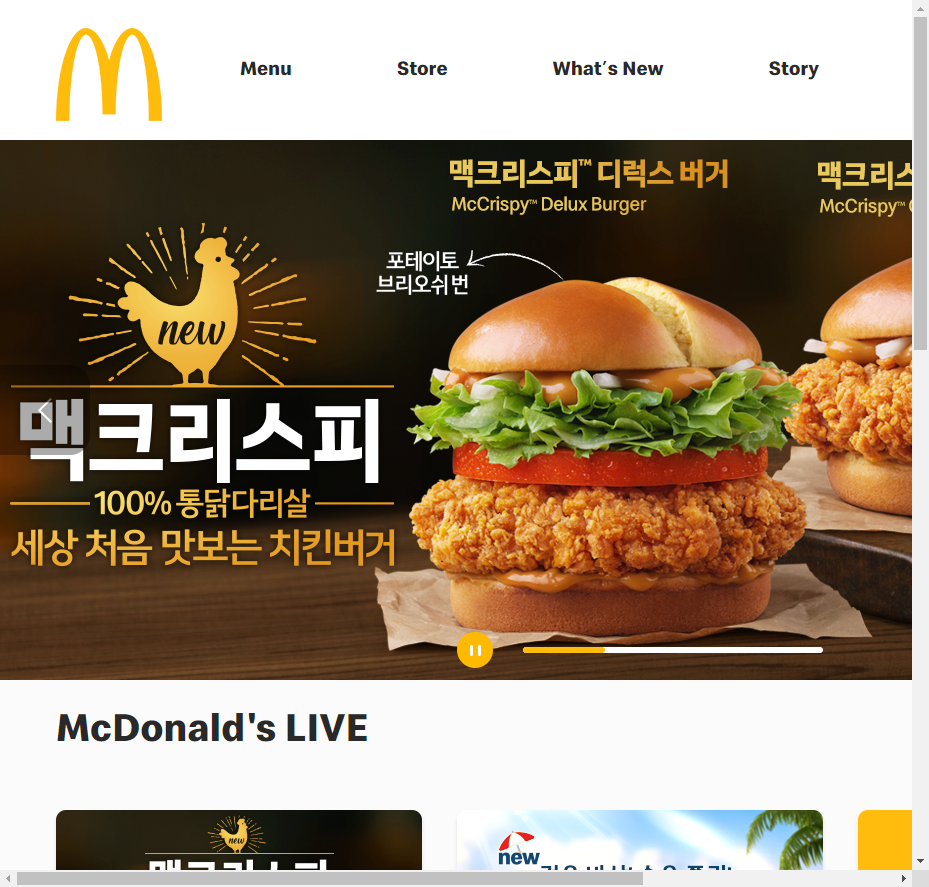

In [7]:
capture_img = './images/mcdonalds_kr.png'
driver.save_screenshot(capture_img)
Image(capture_img)

In [8]:
mcdonalds_url = driver.current_url
mcdonalds_url

'https://www.mcdonalds.co.kr/kor/main.do'

### 맥도날드 서울 매장 정보 크롤링
>수집 데이터 : 매장명, 주소, 전화번호, 영업시간

In [9]:
driver.get(mcdonalds_url)

In [10]:
# Store
driver.find_element_by_css_selector('body > div.wrapper > header > div > nav > div > ul > li:nth-child(2) > a').click()

C:\Users\student\AppData\Local\Temp\ipykernel_1968\452243429.py:2: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  driver.find_element_by_css_selector('body > div.wrapper > header > div > nav > div > ul > li:nth-child(2) > a').click()


In [11]:
# 검색창에 '서울' 입력
driver.find_element_by_css_selector('#searchWord').send_keys('서울')

C:\Users\student\AppData\Local\Temp\ipykernel_1968\1975179579.py:2: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  driver.find_element_by_css_selector('#searchWord').send_keys('서울')


In [12]:
# 검색하기
driver.find_element_by_css_selector('#searchForm > div > fieldset > div > button').click()

C:\Users\student\AppData\Local\Temp\ipykernel_1968\1104218398.py:2: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  driver.find_element_by_css_selector('#searchForm > div > fieldset > div > button').click()


### # Selenium 자바스크립트 함수 작동
- 매장정보 Nevigation 이 JavaScript:page(page_no)로 되어 있음
- 총 페이지 : 1page ~ 20page

In [13]:
driver.implicitly_wait(5)

In [14]:
page_no = 1
driver.execute_script('page({})'.format(page_no))

In [17]:
html = driver.page_source    # driver를 통해 해당 페이지 소스를 가져오고 이거로 url 읽어온다!
soup = BeautifulSoup(html, "lxml")
soup.title

<title>매장찾기</title>

> 데이터 찾기 - 매장명

In [37]:
tbody_tag = table_tag.find('tbody')
type(tbody_tag)

bs4.element.Tag

In [38]:
table_tag

<table class="tableType01">
<caption>매장목록 - 매장명/주소, 전화번호, 영업시간, 이용가능 서비스 정보표</caption>
<colgroup><col/><col style="width:16%"/><col style="width:16%"/><col style="width:34%"/></colgroup>
<thead>
<tr>
<th scope="col">매장명 / 주소</th>
<th scope="col">전화번호</th>
<th scope="col">영업시간</th>
<th scope="col">이용가능 서비스</th>
</tr>
</thead>
<tbody>
<tr>
<td class="tdName">
<dl class="name">
<dt><em class="ico">A</em><strong class="tit"><a href="javascript:moveMap(37.4986859,127.0287553);" title="지도보기">강남 2호점</a></strong>
</dt><dd>서울 강남구 역삼동 822-2</dd>
<dd class="road">서울 강남구 테헤란로 107 메디타워2층</dd>
</dl>
</td>
<td>070-7017-6865 <br/></td>
<td>08:00~24:00 </td>
<td class="tdService">
<div class="service">
<span class="srvc">
<input checked="" disabled="" id="2" type="checkbox"/>
<label for="2">
<span class="icon"><img alt="맥딜리버리" src="/upload/main/store_service/1580887371824.png"/></span>
			                                     	   		맥딜리버리
			                                     	   </label>
</span>
<span

In [39]:
tr_tag = tbody_tag.find_all('tr')
len(tr_tag)

5

In [42]:
tr_tag[0]

<tr>
<td class="tdName">
<dl class="name">
<dt><em class="ico">A</em><strong class="tit"><a href="javascript:moveMap(37.4986859,127.0287553);" title="지도보기">강남 2호점</a></strong>
</dt><dd>서울 강남구 역삼동 822-2</dd>
<dd class="road">서울 강남구 테헤란로 107 메디타워2층</dd>
</dl>
</td>
<td>070-7017-6865 <br/></td>
<td>08:00~24:00 </td>
<td class="tdService">
<div class="service">
<span class="srvc">
<input checked="" disabled="" id="2" type="checkbox"/>
<label for="2">
<span class="icon"><img alt="맥딜리버리" src="/upload/main/store_service/1580887371824.png"/></span>
			                                     	   		맥딜리버리
			                                     	   </label>
</span>
<span class="srvc">
<input checked="" disabled="" id="4" type="checkbox"/>
<label for="4">
<span class="icon"><img alt="맥모닝" src="/upload/main/store_service/1580887410227.png"/></span>
			                                     	   		맥모닝
			                                     	   </label>
</span>
<span class="srvc">
<input checked="" disabl

> 5번 for문 돌때 아래 사용

In [45]:
tr_tags = tbody_tag.find_all('tr')
len(tr_tags)

5

In [271]:
tr_tags[0]

<tr>
<td class="tdName">
<dl class="name">
<dt><em class="ico">A</em><strong class="tit"><a href="javascript:moveMap(37.4986859,127.0287553);" title="지도보기">강남 2호점</a></strong>
</dt><dd>서울 강남구 역삼동 822-2</dd>
<dd class="road">서울 강남구 테헤란로 107 메디타워2층</dd>
</dl>
</td>
<td>070-7017-6865 <br/></td>
<td>08:00~24:00 </td>
<td class="tdService">
<div class="service">
<span class="srvc">
<input checked="" disabled="" id="2" type="checkbox"/>
<label for="2">
<span class="icon"><img alt="맥딜리버리" src="/upload/main/store_service/1580887371824.png"/></span>
			                                     	   		맥딜리버리
			                                     	   </label>
</span>
<span class="srvc">
<input checked="" disabled="" id="4" type="checkbox"/>
<label for="4">
<span class="icon"><img alt="맥모닝" src="/upload/main/store_service/1580887410227.png"/></span>
			                                     	   		맥모닝
			                                     	   </label>
</span>
<span class="srvc">
<input checked="" disabl

In [47]:
idx = 1       # 1~5
tr_tag = tr_tags[idx]

- 지점명 / 주소 찾기

In [272]:
td_tags = tr_tag.find('dl')
td_tags

<dl class="name">
<dt><em class="ico">E</em><strong class="tit"><a href="javascript:moveMap(37.5150646,127.0996860);" title="지도보기">잠실역</a></strong>
</dt><dd>서울 송파구 신천동 7-25</dd>
<dd class="road">서울 송파구 송파대로 558</dd>
</dl>

In [273]:
# 지점명
test = tr_tag.find('dt')
test.get_text()

'E잠실역\n'

In [274]:
# 구주소
test = tr_tag.find('dd')
test.get_text()

'서울 송파구 신천동 7-25'

In [275]:
# 구주소
test = tr_tag.find('dd','road')
test.get_text()

'서울 송파구 송파대로 558'

In [231]:
McName    = list()
McAddrOld = list()
McAddrNew = list()
Add1      = list()
Add2      = list()
Add3      = list()
McPhone   = list()
McOpening = list()
McService = list()

for tr_tag in tr_tags[0:5]:
    mcName = tr_tag.find('dt').get_text().strip()
    mcName = mcName.replace('\n', ' ')
    mcName = mcName.replace(' ', '')
    mcName = mcName[1:]

    mcAddrOld = tr_tag.find('dd').get_text().strip()
    mcAddrNew = tr_tag.find('dd','road').get_text().strip()
    
    add1 = mcAddrNew.split()[0]
    add2 = mcAddrNew.split()[1]
    add3 = mcAddrNew.split()[2]
    
    td_tag = tr_tag.find_all('td')
    mcPhone = td_tag[1].get_text()
    mcPhone
    
    mcOpening = td_tag[2].get_text()
    mcOpening
    
    imgTags = tr_tag.find_all('img')
    for img in imgTags:
        mcService = img['alt']
        McService.append(mcService)

    McName.append(mcName)
    McAddrOld.append(mcAddrOld)
    McAddrNew.append(mcAddrNew)
    Add1.append(add1)
    Add2.append(add2)
    Add3.append(add3)
    McPhone.append(mcPhone)
    McOpening.append(mcOpening)

data   = {'매장명':McName,'시':add1,'구':add2,'동':add3,'지번주소':McAddrOld,'도로명주소':McAddrNew,
          '전화번호': McPhone,'영업시간' : McOpening, '이용가능서비스' : McService}



In [232]:
ret_df = pd.DataFrame(data)
ret_df.head(10)

ValueError: All arrays must be of the same length

> 교안 Version

### # 마지막페이지에 대한 고민
- 없는 페이지도 읽혀는 진다.
- 하지만, 매장정보가 없다. OK!!!

In [186]:
page_no = 99
driver.execute_script('page({})'.format(page_no))

In [187]:
html = driver.page_source
soup = BeautifulSoup(html, "lxml")

In [188]:
mcStore = soup.find('div', 'mcStore')
mcStore

<div class="mcStore">
<p style="color:#da0000"> *영업시간은 매장 사정에 따라 변경 될 수 있습니다 </p>
<table class="tableType01">
<caption>매장목록 - 매장명/주소, 전화번호, 영업시간, 이용가능 서비스 정보표</caption>
<colgroup><col/><col style="width:16%"/><col style="width:16%"/><col style="width:34%"/></colgroup>
<thead>
<tr>
<th scope="col">매장명 / 주소</th>
<th scope="col">전화번호</th>
<th scope="col">영업시간</th>
<th scope="col">이용가능 서비스</th>
</tr>
</thead>
<tbody>
</tbody></table>
<div class="btnPaging"><a class="arrow first" href="javascript:page(1);" role="button">맨앞으로</a><a class="arrow prev" href="javascript:page(98);" role="button">이전</a><span class="num"><a href="javascript:page(91);" role="button">91</a><a href="javascript:page(92);" role="button">92</a><a href="javascript:page(93);" role="button">93</a><a href="javascript:page(94);" role="button">94</a><a href="javascript:page(95);" role="button">95</a><a href="javascript:page(96);" role="button">96</a><a href="javascript:page(97);" role="button">97</a><a href="javascript:page(9

In [189]:
tbody = mcStore.find_all('tbody')
len(tbody)

1

In [190]:
tbody = mcStore.find('tbody')
listStore = tbody.find_all('tr')
len(listStore)

0

In [191]:
if len(listStore) == 0:
    print('Nothing')

Nothing


In [192]:
from itertools import count

for page_no in count(start=1, step=1):
    if page_no>10:
        break
    print(page_no)

1
2
3
4
5
6
7
8
9
10


In [233]:
mcName    = list()
mcAddrOld = list()
mcAddrNew = list()
mcPhone   = list()
mcOpening = list()
mcService = list()

t_sec = 0.1
for page_no in count(start=1, step=1):
    
    driver.implicitly_wait(5)
    driver.execute_script('page({})'.format(page_no))

    time.sleep(t_sec)
    html = driver.page_source
    soup = BeautifulSoup(html, "lxml")

    mcStore = soup.find('div', 'mcStore')
    tbody = mcStore.find('tbody')
    listStore = tbody.find_all('tr')

    if len(listStore) == 0:
        print('-'*90)
        print('총 {}개의 맥도날드 매장정보가 수집되었습니다.'.format(len(mcName)))
        break


    for eachStore in listStore:
        tdTag = eachStore.find_all('td')

        mc_name = tdTag[0].find('a').get_text()
        print('□', end=''); time.sleep(t_sec);

        mc_addr = tdTag[0].find_all('dd')
        mc_addr_old = mc_addr[0].get_text().strip()
        mc_addr_new = mc_addr[1].get_text().strip()
        print('□', end=''); time.sleep(t_sec);

        mc_phone = tdTag[1].get_text().strip()
        print('□', end=''); time.sleep(t_sec);

        mc_opening = tdTag[2].get_text().strip()
        print('□', end=''); time.sleep(t_sec);

        mc_service = list()
        imgTags = tdTag[3].find_all('img')
        for img in imgTags:
            service = img['alt']
            mc_service.append(service)

        mc_service2 = ' / '.join(mc_service)
        print('□', end=''); time.sleep(t_sec);

        mcName   .append(mc_name)
        mcAddrOld.append(mc_addr_old)
        mcAddrNew.append(mc_addr_new)
        mcPhone  .append(mc_phone)
        mcOpening.append(mc_opening)
        # mcService.append(mc_service)
        mcService.append(mc_service2)
        
        time.sleep(t_sec)
        print('■', end='')
    
    print(' : {p_no}page crwaling completed.'.format(
        p_no = ' '+str(page_no) if page_no<10 else page_no)
    )

□□□□□■□□□□□■□□□□□■□□□□□■□□□□□■ :  1page crwaling completed.
□□□□□■□□□□□■□□□□□■□□□□□■□□□□□■ :  2page crwaling completed.
□□□□□■□□□□□■□□□□□■□□□□□■□□□□□■ :  3page crwaling completed.
□□□□□■□□□□□■□□□□□■□□□□□■□□□□□■ :  4page crwaling completed.
□□□□□■□□□□□■□□□□□■□□□□□■□□□□□■ :  5page crwaling completed.
□□□□□■□□□□□■□□□□□■□□□□□■□□□□□■ :  6page crwaling completed.
□□□□□■□□□□□■□□□□□■□□□□□■□□□□□■ :  7page crwaling completed.
□□□□□■□□□□□■□□□□□■□□□□□■□□□□□■ :  8page crwaling completed.
□□□□□■□□□□□■□□□□□■□□□□□■□□□□□■ :  9page crwaling completed.
□□□□□■□□□□□■□□□□□■□□□□□■□□□□□■ : 10page crwaling completed.
□□□□□■□□□□□■□□□□□■□□□□□■□□□□□■ : 11page crwaling completed.
□□□□□■□□□□□■□□□□□■□□□□□■□□□□□■ : 12page crwaling completed.
□□□□□■□□□□□■□□□□□■□□□□□■□□□□□■ : 13page crwaling completed.
□□□□□■□□□□□■□□□□□■□□□□□■□□□□□■ : 14page crwaling completed.
□□□□□■□□□□□■□□□□□■□□□□□■□□□□□■ : 15page crwaling completed.
□□□□□■□□□□□■□□□□□■□□□□□■□□□□□■ : 16page crwaling completed.
□□□□□■□□□□□■□□□□□■□□□□□■□□□□□■ : 17page 

In [234]:
' / '.join(mcName)

'강남 2호점 / 미아역 / 마리오 아울렛 / 등촌 DT / 잠실역 / 성균관대 / 석촌역 / 서울교대점 / 양평SK DT / 신월남부 DT점 / 연세대점 / 삼성역 / 합정메세나폴리스 / 여의도 / 강남구청 / 어린이대공원점 / 명동 2호점 / 가산디지털 / 양재 SK DT / 가산비지니스센터점 / 이수점 / 신도림 디큐브 / 공덕점 / 중앙대 / 한티역 / 선릉 / 서초GS점 / 명동 / 구로디지털 / 종로 3 / 은평이마트 / 압구정CGV / 서초뱅뱅 / 쌍문DT점 / 성수이마트 / 양재 / 신도림 테크노점 / 서울역 / 종암SK / 구산 / 가락DT점 / 신천 / 송정역 / 전농 / 파리공원점 / 연신내 / 상봉이마트 / 청담DT / 양천구청DT점 / 한양대 / 신내 / 대학로 / 중계역 / 구의역 / 목동 / 중랑 / 중계 / 삼선 / 영등포 / 신림 / 안암 / 수유 / 방배 / 노량진 / 이태원 / 신월DT / 장안사거리점 / 외대 / 신사역 / 학동역 / 염창 DT점 / 명지대점 / 숭실대 / 상계DT / 양주휴게소DT / 상일동점 / 방학역DT점 / 송파잠실DT / 과학기술대점 / 서울시흥DT / 서울번동DT점 / 미아DT / 우장산DT / 굽은다리역DT / 서울둔촌DT / 고척DT / 보라매 / 코엑스 / 서울 상암 DMC / 홍제역 / 강남삼성DT / 동묘 / 망원점 / 위례신도시 / 세이브존 노원 / 서울시청'

In [235]:
mcAddr = zip(mcAddrOld, mcAddrNew)
list(mcAddr)[:10]

[('서울 강남구 역삼동 822-2', '서울 강남구 테헤란로 107 메디타워2층'),
 ('서울 강북구 미아동 197-5', '서울 강북구 도봉로 204 미아역 맥도날드'),
 ('서울 금천구 가산동 60-22', '서울 금천구 디지털로 185 마리오아울렛1'),
 ('서울 강서구 등촌동 630', '서울 강서구 양천로 546'),
 ('서울 송파구 신천동 7-25', '서울 송파구 송파대로 558'),
 ('서울 종로구 명륜2가 197-1', '서울 종로구 창경궁로 241-1'),
 ('서울 송파구 송파동 84', '서울 송파구 백제고분로 390'),
 ('서울 서초구 서초동 1674-5', '서울 서초구 서초대로 316(서초동)'),
 ('서울 영등포구 양평동3가 80-2', '서울 영등포구 선유로 195'),
 ('서울 양천구 신월동 525-1', '서울 양천구 남부순환로 553 (신월동)')]

In [236]:
mcEtc = zip(mcPhone, mcOpening, mcService)
list(mcEtc)[:10]

[('070-7017-6865', '08:00~24:00', '맥딜리버리 / 맥모닝 / 디카페인 커피'),
 ('070-7017-6856', '07:00~02:00', '맥딜리버리 / 맥모닝 / 디카페인 커피'),
 ('070-7017-6527', '10:00~22:00', '맥모닝 / 주차 / 디카페인 커피'),
 ('070-7017-6526', '24시간', '24시간 / 맥드라이브 / 맥딜리버리 / 맥모닝 / 주차 / 디카페인 커피'),
 ('070-7017-6952', '24시간', '24시간 / 맥딜리버리 / 맥모닝 / 디카페인 커피'),
 ('070-7017-6520', '08:00~24:00', '맥딜리버리 / 맥모닝 / 디카페인 커피'),
 ('070-7017-6515', '24시간', '24시간 / 맥딜리버리 / 맥모닝 / 디카페인 커피'),
 ('070-7017-6987 070-7017-6989', '10:00~22:30', '맥딜리버리 / 맥모닝 / 주차 / 디카페인 커피'),
 ('070-7017-6505', '24시간', '24시간 / 맥드라이브 / 맥딜리버리 / 맥모닝 / 주차 / 디카페인 커피'),
 ('070-7017-6917 070-7017-6772', '07:00~24:00', '맥드라이브 / 맥딜리버리 / 맥모닝 / 주차')]

In [237]:
mcAddrOld[0].split()

['서울', '강남구', '역삼동', '822-2']

In [239]:
mcAddrGu =  [eachAddr.split()[1] for eachAddr in mcAddrNew]
len(mcAddrGu)

96

In [240]:
mcAddrCity =  [eachAddr.split()[0] for eachAddr in mcAddrNew]
len(mcAddrCity)

96

In [241]:
mcAddrDong =  [eachAddr.split()[2] for eachAddr in mcAddrNew]
len(mcAddrDong)

96

In [242]:
mc_dict = dict()
mc_dict['매장명'        ] = mcName
mc_dict['시'            ] = mcAddrCity
mc_dict['구'            ] = mcAddrGu
mc_dict['동'            ] = mcAddrDong
mc_dict['지번주소'      ] = mcAddrOld
mc_dict['도로명주소'    ] = mcAddrNew
mc_dict['전화번호'      ] = mcPhone
mc_dict['영업시간'      ] = mcOpening
mc_dict['이용가능서비스'] = mcService

In [243]:
mc_dict.keys()

dict_keys(['매장명', '시', '구', '동', '지번주소', '도로명주소', '전화번호', '영업시간', '이용가능서비스'])

In [244]:
macdonald_df = pd.DataFrame(mc_dict)
macdonald_df.head(10)

,매장명,시,구,동,지번주소,도로명주소,전화번호,영업시간,이용가능서비스
0,강남 2호점,서울,강남구,테헤란로,서울 강남구 역삼동 822-2,서울 강남구 테헤란로 107 메디타워2층,070-7017-6865,08:00~24:00,맥딜리버리 / 맥모닝 / 디카페인 커피
1,미아역,서울,강북구,도봉로,서울 강북구 미아동 197-5,서울 강북구 도봉로 204 미아역 맥도날드,070-7017-6856,07:00~02:00,맥딜리버리 / 맥모닝 / 디카페인 커피
2,마리오 아울렛,서울,금천구,디지털로,서울 금천구 가산동 60-22,서울 금천구 디지털로 185 마리오아울렛1,070-7017-6527,10:00~22:00,맥모닝 / 주차 / 디카페인 커피
3,등촌 DT,서울,강서구,양천로,서울 강서구 등촌동 630,서울 강서구 양천로 546,070-7017-6526,24시간,24시간 / 맥드라이브 / 맥딜리버리 / 맥모닝 / 주차 / 디카페인 커피
4,잠실역,서울,송파구,송파대로,서울 송파구 신천동 7-25,서울 송파구 송파대로 558,070-7017-6952,24시간,24시간 / 맥딜리버리 / 맥모닝 / 디카페인 커피
5,성균관대,서울,종로구,창경궁로,서울 종로구 명륜2가 197-1,서울 종로구 창경궁로 241-1,070-7017-6520,08:00~24:00,맥딜리버리 / 맥모닝 / 디카페인 커피
6,석촌역,서울,송파구,백제고분로,서울 송파구 송파동 84,서울 송파구 백제고분로 390,070-7017-6515,24시간,24시간 / 맥딜리버리 / 맥모닝 / 디카페인 커피
7,서울교대점,서울,서초구,서초대로,서울 서초구 서초동 1674-5,서울 서초구 서초대로 316(서초동),070-7017-6987 070-7017-6989,10:00~22:30,맥딜리버리 / 맥모닝 / 주차 / 디카페인 커피
8,양평SK DT,서울,영등포구,선유로,서울 영등포구 양평동3가 80-2,서울 영등포구 선유로 195,070-7017-6505,24시간,24시간 / 맥드라이브 / 맥딜리버리 / 맥모닝 / 주차 / 디카페인 커피
9,신월남부 DT점,서울,양천구,남부순환로,서울 양천구 신월동 525-1,서울 양천구 남부순환로 553 (신월동),070-7017-6917 070-7017-6772,07:00~24:00,맥드라이브 / 맥딜리버리 / 맥모닝 / 주차


In [245]:
macdonald_df['구'].unique()

array(['강남구', '강북구', '금천구', '강서구', '송파구', '종로구', '서초구', '영등포구', '양천구',
       '서대문구', '마포구', '광진구', '중구', '동작구', '구로구', '은평구', '도봉구', '성동구',
       '용산구', '성북구', '동대문구', '중랑구', '노원구', '관악구', '양주시', '강동구'],
      dtype=object)

In [246]:
macdonald_df['구'].value_counts()

강남구     11
송파구      6
서초구      6
양천구      5
노원구      5
구로구      4
강북구      4
마포구      4
동작구      4
영등포구     4
금천구      4
종로구      4
강서구      4
서대문구     3
중랑구      3
동대문구     3
성북구      3
강동구      3
은평구      3
중구       3
용산구      2
도봉구      2
광진구      2
성동구      2
관악구      1
양주시      1
Name: 구, dtype: int64

In [247]:
macdonald_cnt = macdonald_df['구'].value_counts()
macdonald_cnt.tail()

도봉구    2
광진구    2
성동구    2
관악구    1
양주시    1
Name: 구, dtype: int64

In [248]:
# 서울시 아닌놈이 있어 삭제
macdonald_cnt.drop('양주시', inplace=True)

In [249]:
macdonald_cnt.tail()

용산구    2
도봉구    2
광진구    2
성동구    2
관악구    1
Name: 구, dtype: int64

In [251]:
population = pd.read_csv('data/seoul_population.csv', sep=',', encoding='euc-kr')
population

,구,세대,인구수,세대당인구,65세이상고령자,고령비율
0,종로구,73766,153684,1.96,28064,18.260847
1,중구,63767,131450,1.92,24742,18.822366
2,용산구,111207,236518,2.00,39461,16.684142
3,성동구,134533,291609,2.12,46896,16.081808
4,광진구,169483,353110,2.01,52604,14.897341
5,동대문구,169695,352592,1.99,62963,17.857183
6,중랑구,187693,393600,2.07,72851,18.508892
7,성북구,197296,442680,2.20,75719,17.104681
8,강북구,144725,300824,2.05,64961,21.594354
9,도봉구,138836,318100,2.28,65122,20.472179


In [252]:
population.set_index('구', inplace=True)
population.head()

,세대,인구수,세대당인구,65세이상고령자,고령비율
구,,,,,
종로구,73766,153684,1.96,28064,18.260847
중구,63767,131450,1.92,24742,18.822366
용산구,111207,236518,2.00,39461,16.684142
성동구,134533,291609,2.12,46896,16.081808
광진구,169483,353110,2.01,52604,14.897341


In [253]:
# 읽어온 파일에 구별 맥도날드 수 추가
population = pd.concat([population, macdonald_cnt], axis=1, sort=True)
population.head()

,세대,인구수,세대당인구,65세이상고령자,고령비율,구
강남구,234612,537338,2.27,79575,14.809115,11
강동구,201926,465097,2.28,75477,16.228228,3
강북구,144725,300824,2.05,64961,21.594354,4
강서구,272572,578426,2.10,93924,16.237859,4
관악구,279353,500336,1.74,80686,16.126363,1


In [254]:
population.rename(columns = {'구':'맥도날드'}, inplace=True)

In [255]:
population.head()

,세대,인구수,세대당인구,65세이상고령자,고령비율,맥도날드
강남구,234612,537338,2.27,79575,14.809115,11
강동구,201926,465097,2.28,75477,16.228228,3
강북구,144725,300824,2.05,64961,21.594354,4
강서구,272572,578426,2.10,93924,16.237859,4
관악구,279353,500336,1.74,80686,16.126363,1


In [256]:
population['맥도날드'] / population['인구수'] * 100 * 10000

강남구     20.471286
강동구      6.450267
강북구     13.296811
강서구      6.915318
관악구      1.998657
광진구      5.663957
구로구      9.524172
금천구     16.333131
노원구      9.719212
도봉구      6.287331
동대문구     8.508418
동작구     10.135589
마포구     10.564431
서대문구     9.461484
서초구     14.504070
성동구      6.858499
성북구      6.776904
송파구      8.978528
양천구     11.126490
영등포구     9.993979
용산구      8.456016
은평구      6.302349
종로구     26.027433
중구      22.822366
중랑구      7.621951
dtype: float64

In [257]:
population['맥버거지표'] = population['맥도날드'] / population['인구수'] * 100 * 10000

In [258]:
population.head()

,세대,인구수,세대당인구,65세이상고령자,고령비율,맥도날드,맥버거지표
강남구,234612,537338,2.27,79575,14.809115,11,20.471286
강동구,201926,465097,2.28,75477,16.228228,3,6.450267
강북구,144725,300824,2.05,64961,21.594354,4,13.296811
강서구,272572,578426,2.10,93924,16.237859,4,6.915318
관악구,279353,500336,1.74,80686,16.126363,1,1.998657


In [259]:
population.rename(columns = {'65세이상고령자':'고령자'}, inplace=True)

In [260]:
population.sort_values(by='맥도날드', ascending=False).head(10)

,세대,인구수,세대당인구,고령자,고령비율,맥도날드,맥버거지표
강남구,234612,537338,2.27,79575,14.809115,11,20.471286
송파구,285106,668261,2.32,99854,14.942365,6,8.978528
서초구,169895,413677,2.41,61404,14.843465,6,14.504070
노원구,219065,514445,2.33,89426,17.383005,5,9.719212
양천구,181765,449378,2.45,69953,15.566628,5,11.126490
종로구,73766,153684,1.96,28064,18.260847,4,26.027433
영등포구,188193,400241,2.00,63547,15.877184,4,9.993979
동작구,186419,394649,2.07,67470,17.096204,4,10.135589
마포구,180702,378629,2.04,55168,14.570463,4,10.564431
금천구,118697,244901,1.95,41819,17.075880,4,16.333131


In [261]:
population.sort_values(by='인구수', ascending=False).head(10)

,세대,인구수,세대당인구,고령자,고령비율,맥도날드,맥버거지표
송파구,285106,668261,2.32,99854,14.942365,6,8.978528
강서구,272572,578426,2.10,93924,16.237859,4,6.915318
강남구,234612,537338,2.27,79575,14.809115,11,20.471286
노원구,219065,514445,2.33,89426,17.383005,5,9.719212
관악구,279353,500336,1.74,80686,16.126363,1,1.998657
은평구,215178,476013,2.19,88418,18.574703,3,6.302349
강동구,201926,465097,2.28,75477,16.228228,3,6.450267
양천구,181765,449378,2.45,69953,15.566628,5,11.126490
성북구,197296,442680,2.20,75719,17.104681,3,6.776904
구로구,181916,419984,2.18,73864,17.587337,4,9.524172


In [262]:
population.sort_values(by='맥버거지표', ascending=False).head(10)

,세대,인구수,세대당인구,고령자,고령비율,맥도날드,맥버거지표
종로구,73766,153684,1.96,28064,18.260847,4,26.027433
중구,63767,131450,1.92,24742,18.822366,3,22.822366
강남구,234612,537338,2.27,79575,14.809115,11,20.471286
금천구,118697,244901,1.95,41819,17.075880,4,16.333131
서초구,169895,413677,2.41,61404,14.843465,6,14.504070
강북구,144725,300824,2.05,64961,21.594354,4,13.296811
양천구,181765,449378,2.45,69953,15.566628,5,11.126490
마포구,180702,378629,2.04,55168,14.570463,4,10.564431
동작구,186419,394649,2.07,67470,17.096204,4,10.135589
영등포구,188193,400241,2.00,63547,15.877184,4,9.993979


In [264]:
import json
import folium
import warnings

warnings.simplefilter(action = "ignore", category = FutureWarning)

geo_path = 'data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

macDat = pd.DataFrame({'gu':population.index, 'counts':population['맥버거지표']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_str,
              data=macDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')

In [265]:
map

In [268]:
population.sort_values('맥버거지표', ascending = False)

,세대,인구수,세대당인구,고령자,고령비율,맥도날드,맥버거지표
종로구,73766,153684,1.96,28064,18.260847,4,26.027433
중구,63767,131450,1.92,24742,18.822366,3,22.822366
강남구,234612,537338,2.27,79575,14.809115,11,20.471286
금천구,118697,244901,1.95,41819,17.075880,4,16.333131
서초구,169895,413677,2.41,61404,14.843465,6,14.504070
강북구,144725,300824,2.05,64961,21.594354,4,13.296811
양천구,181765,449378,2.45,69953,15.566628,5,11.126490
마포구,180702,378629,2.04,55168,14.570463,4,10.564431
동작구,186419,394649,2.07,67470,17.096204,4,10.135589
영등포구,188193,400241,2.00,63547,15.877184,4,9.993979


In [269]:
population.to_csv('data/seoul_population_mac-idx.csv', sep=',', encoding='euc-kr')

### seqborn이 제공해주는 pairplot 을 사용해서 분석

In [279]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False

plt.rcParams['figure.figsize']=(15,15)

In [280]:
sns.set()
sns.set_style('darkgrid')
sns.set(font="Malgun Gothic")
sns.set_color_codes()

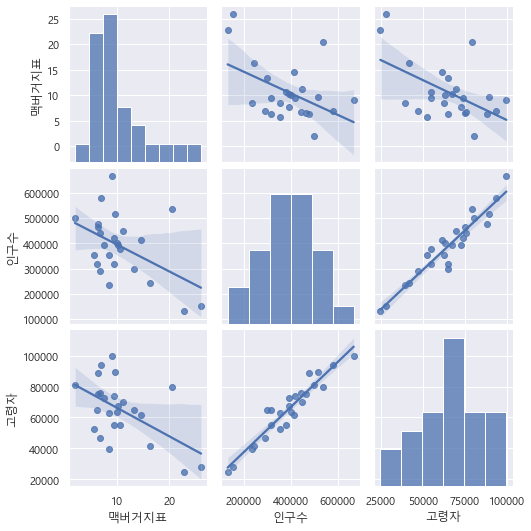

In [281]:
sns.pairplot(population, vars=["맥버거지표", "인구수", "고령자"], kind="reg");

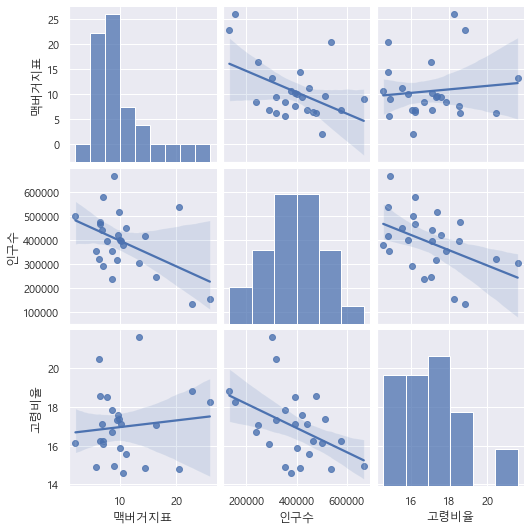

In [282]:
sns.pairplot(population, vars=["맥버거지표", "인구수", "고령비율"], kind="reg");

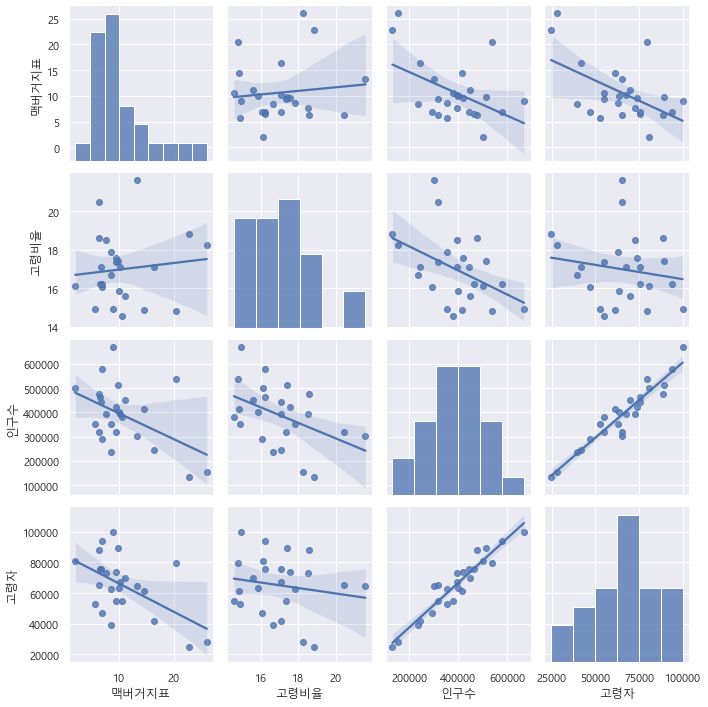

In [283]:
sns.pairplot(population, vars=["맥버거지표", "고령비율", "인구수", "고령자"], kind="reg");